In [77]:
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet
df_btc = pd.read_csv("./input/Bitstamp_BTCUSD_d.csv")
df_eth=pd.read_csv("./input/Bitstamp_ETHUSD_d.csv")
df_link=pd.read_csv("./input/LINK-USD.csv")
df_nano=pd.read_csv("./input/NANO_Daily.csv")

df_btc.head()
df_nano.head()


,Date,Close,Open,High,Low,Vol.,Change %
0,5-May-21,10.3212,9.3936,10.6717,9.2845,8.47M,9.17%
1,4-May-21,9.4539,10.5757,10.5834,9.3436,9.40M,-10.62%
2,3-May-21,10.5777,10.3147,10.9848,10.2757,9.89M,2.23%
3,2-May-21,10.3468,10.4302,12.0042,10.0349,24.40M,-0.80%
4,1-May-21,10.4304,9.0029,11.5225,8.8010,19.63M,15.86%


In [78]:
df_btc = df_btc[["date", "close"]]  
df_btc.head()
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc.rename(columns={"date": "ds", "close": "y"}, inplace=True)
df_btc.resample('D', on='ds').mean()
df_btc=df_btc.dropna()


In [79]:

df_eth = df_eth[["date", "close"]]  
df_eth['date'] = pd.to_datetime(df_eth['date'])
df_eth.rename(columns={"date": "ds", "close": "y"}, inplace=True)
df_eth.resample('D', on='ds').mean()
df_eth=df_eth.dropna()
df_eth.head()

,ds,y
0,2021-05-05,3287.99
1,2021-05-04,3238.42
2,2021-05-03,3430.16
3,2021-05-02,2951.78
4,2021-05-01,2947.57


In [80]:

df_link[["Date", "AdjClose"]]
df_link = df_link[["Date", "AdjClose"]]  
df_link['Date'] = pd.to_datetime(df_link['Date'])
df_link.rename(columns={"Date": "ds", "AdjClose": "y"}, inplace=True)
df_link.resample('D', on='ds').mean()
df_link=df_link.dropna()
df_link.head()

,ds,y
0,2017-09-20,0.189165
1,2017-09-21,0.169680
2,2017-09-22,0.150503
3,2017-09-23,0.131129
4,2017-09-24,0.170278


In [81]:
df_nano[["Date", "Close"]]
df_nano = df_nano[["Date", "Close"]]  
df_nano['Date'] = pd.to_datetime(df_nano['Date'])
df_nano.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)
df_nano.resample('D', on='ds').mean()
df_nano=df_nano.dropna()
df_nano.head()

,ds,y
0,2021-05-05,10.3212
1,2021-05-04,9.4539
2,2021-05-03,10.5777
3,2021-05-02,10.3468
4,2021-05-01,10.4304


In [82]:
def conv_to_months(df):
    pd.DatetimeIndex(df.ds).to_period('M')
    df.groupby(pd.DatetimeIndex(df.ds).to_period('M')).nth(-1)
    df.tail()
    return df

df_btc=conv_to_months(df_btc)
df_eth=conv_to_months(df_eth)
df_link=conv_to_months(df_link)
df_nano=conv_to_months(df_nano)

<AxesSubplot:>

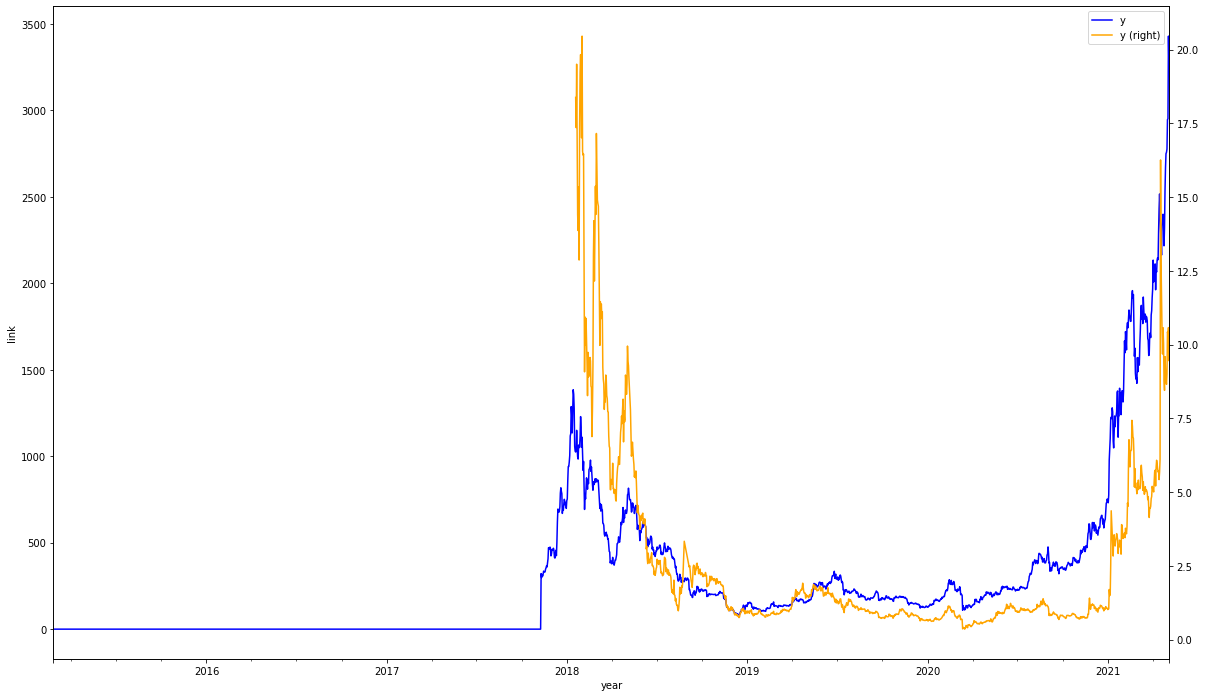

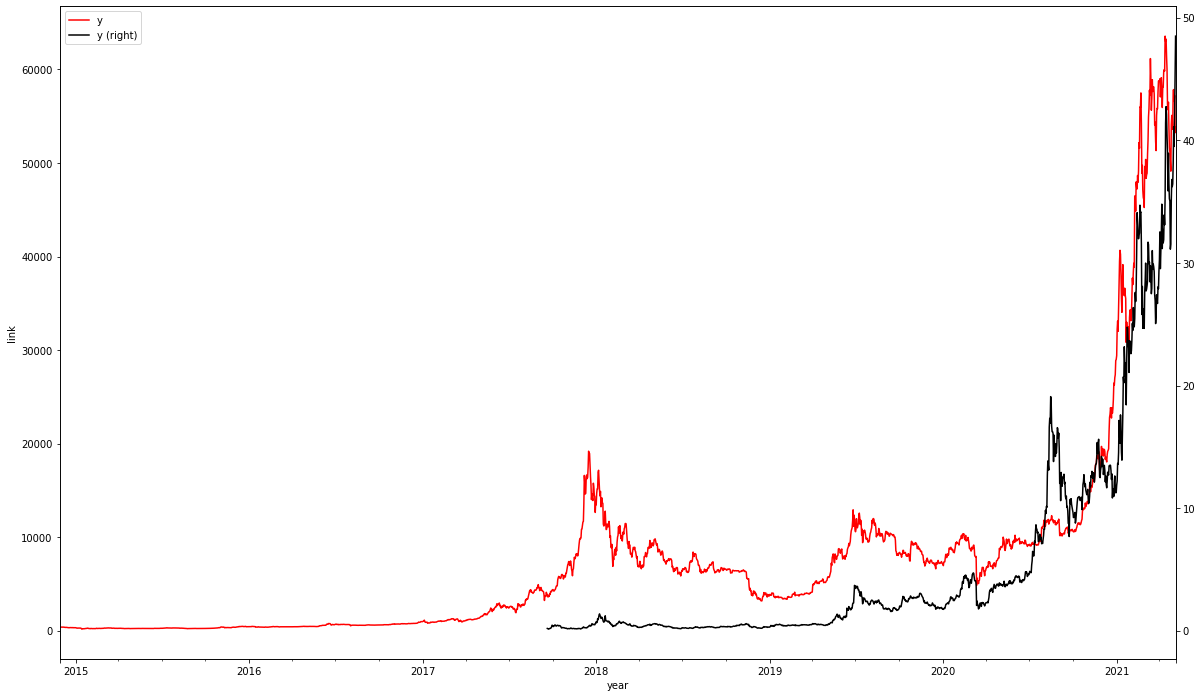

In [85]:

#fig, ax = plt.subplots()
#ax3 = ax.twinx()
#rspine = ax3.spines['right']
#rspine.set_position(('axes', 1.15))
#ax3.set_frame_on(True)
#ax3.patch.set_visible(False)
#fig.subplots_adjust(right=0.7)
#df_link.plot(ax=ax3, style='g-')
#ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],['BTC','ETH','LINK'], bbox_to_anchor=(1.5, 0.5))

ax = df_eth.plot(kind='line',x='ds',y='y',color=('blue','orange'),logy=1,ylabel='eth',xlabel='year',figsize=(20, 12))
df_nano.plot(kind='line',x='ds',y='y',color='orange',logy=1,ylabel='link',xlabel='year',figsize=(20, 12), ax=ax,secondary_y=True)

ax2=df_btc.plot(kind='line',x='ds',y='y',color='red',logy=1,ylabel='price',xlabel='year',figsize=(20, 12))
df_link.plot(kind='line',x='ds',y='y',color='black',logy=1,ylabel='link',xlabel='year',figsize=(20, 12), ax=ax2,secondary_y=True)
